In [84]:
from models.autoencoder import AutoEncoder
from models.nnmodel import NNModel
from models.rfmodel import RFModel
from data_processor.data_processing import DataProcessing
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from data_processor.base_bars import BaseBars

In [85]:
features = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [86]:
features.head()

,Unnamed: 0,date,open,close,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,25,2/8/00,4.0714,4.1027,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,26,2/9/00,4.0804,4.0224,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,27,2/10/00,4.0224,4.0536,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,28,2/11/00,4.0581,3.8840,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,29,2/14/00,3.9018,4.1362,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325


In [87]:
features = features.drop('Unnamed: 0', axis=1)
features = features.drop('date', axis=1)

In [88]:
features = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]

In [89]:
features.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [90]:
n = features.shape[0]
n_train = 7*n//10
n_val = 3*n//20

In [91]:
#features = features.drop('volume', axis=1)
#features = features.drop('Unnamed: 0', axis=1)
y = features['close']
x = features.drop('close', axis=1)

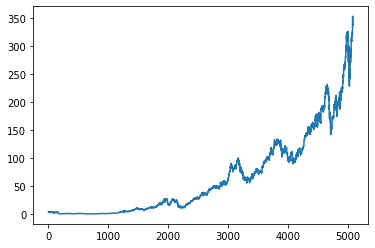

In [92]:
plt.plot(y)

In [93]:
x.shape

(5079, 17)

In [94]:
train = x.iloc[:n_train,:]
test = x.iloc[n_train:,:]

In [95]:
test.shape

(1524, 17)

In [96]:
a_train_y = y[:n_train]
train_y = a_train_y
a_test_y = y[n_train:]
test_y = a_test_y

In [97]:
a_train_x = train
a_test_x = test

In [98]:
a_train_x

,open,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,4.0714,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,4.0804,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,4.0224,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,4.0581,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,3.9018,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325
5,4.1284,4.1161,4.2824,0,3.900820,4.287682,3.513958,0.237409,0.085045,138.698707,3.958198,17.096019,3.907042,4.06924,96.393589,4.327761,17.096019
6,4.2076,4.0089,4.2120,0,3.913990,4.304929,3.523051,0.237673,0.085945,79.482141,3.972999,9.818103,3.937358,4.07860,76.268923,-0.816535,9.818103
7,4.1161,4.0447,4.1239,0,3.916445,4.311455,3.521435,0.226353,0.088343,79.108264,3.990292,14.587756,3.980883,4.08842,79.997774,1.996321,14.587756
8,4.0893,3.9666,4.1206,0,3.916335,4.311281,3.521389,0.221185,0.078893,47.481847,3.988026,12.586779,4.017900,4.10628,61.905349,-1.980955,12.586779
9,3.9297,3.8148,4.1674,0,3.929840,4.325696,3.533984,0.230572,0.077889,42.035370,3.998263,10.163152,4.049150,4.09200,73.182154,4.654995,10.163152


In [99]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_a = scaler.fit_transform(a_train_x)
x_test_a = scaler.transform(a_test_x)

In [100]:
x_train_a.shape

(3555, 17)

In [101]:
autoencoder = AutoEncoder(10, x_train_a.shape[1])
autoencoder.build_model()

In [102]:
print('Training model...')
autoencoder.train_model(autoencoder.autoencoder, x_train_a, epochs=100, model_name='autoencoder')

Training model...
Epoch 1/100
3555/3555 [==============================] - 0s 120us/step - loss: 0.4417 - acc: 0.3738 - mae: 0.5578
Epoch 2/100
3555/3555 [==============================] - 0s 87us/step - loss: 0.4028 - acc: 0.4878 - mae: 0.5212
Epoch 3/100
3555/3555 [==============================] - 0s 76us/step - loss: 0.3998 - acc: 0.4878 - mae: 0.5144
Epoch 4/100
3555/3555 [==============================] - 0s 69us/step - loss: 0.3990 - acc: 0.4928 - mae: 0.5117
Epoch 5/100
3555/3555 [==============================] - 0s 80us/step - loss: 0.3986 - acc: 0.5044 - mae: 0.5104: 0s - loss: 0.4002 - acc: 0.4936 - mae: 0.
Epoch 6/100
3555/3555 [==============================] - 0s 78us/step - loss: 0.3984 - acc: 0.5125 - mae: 0.5093
Epoch 7/100
3555/3555 [==============================] - 0s 70us/step - loss: 0.3982 - acc: 0.5210 - mae: 0.5084
Epoch 8/100
3555/3555 [==============================] - 0s 77us/step - loss: 0.3980 - acc: 0.5451 - mae: 0.5076
Epoch 9/100
3555/3555 [===========

Epoch 72/100
3555/3555 [==============================] - 0s 72us/step - loss: 0.3934 - acc: 0.7797 - mae: 0.4909
Epoch 73/100
3555/3555 [==============================] - 0s 97us/step - loss: 0.3934 - acc: 0.7755 - mae: 0.4909
Epoch 74/100
3555/3555 [==============================] - 0s 66us/step - loss: 0.3934 - acc: 0.7744 - mae: 0.4909
Epoch 75/100
3555/3555 [==============================] - 0s 95us/step - loss: 0.3934 - acc: 0.7755 - mae: 0.4909
Epoch 76/100
3555/3555 [==============================] - 0s 139us/step - loss: 0.3934 - acc: 0.7820 - mae: 0.4908
Epoch 77/100
3555/3555 [==============================] - 0s 91us/step - loss: 0.3934 - acc: 0.7812 - mae: 0.4909
Epoch 78/100
3555/3555 [==============================] - 0s 83us/step - loss: 0.3934 - acc: 0.7803 - mae: 0.4908
Epoch 79/100
3555/3555 [==============================] - 0s 58us/step - loss: 0.3934 - acc: 0.7834 - mae: 0.4908
Epoch 80/100
3555/3555 [==============================] - 0s 63us/step - loss: 0.3934 -

In [103]:
print('Testing model...')
autoencoder.test_model(autoencoder.autoencoder, x_test_a)

Testing model...
1524/1524 [==============================] - 0s 53us/step
[1.2410401209132877, 0.4212598502635956, 0.5490211844444275]


In [104]:
a_scaled_full = pd.DataFrame(scaler.transform(x))

In [105]:
a_scaled_full.shape

(5079, 17)

In [106]:
autoencoder.encode_data(a_scaled_full, csv_path='./full_x.csv')

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.157952,0.280636,0.000000,0.880526,0.195406,0.626498,0.402243,0.000000,0.617788
1,0.000000,1.170672,0.247377,0.000000,0.927541,0.227788,0.624884,0.372125,0.000000,0.651805
2,0.000000,1.119776,0.229438,0.000000,1.026744,0.247585,0.624539,0.332817,0.000000,0.699902
3,0.000000,0.888927,0.274995,0.000000,0.759642,0.167362,0.580255,0.453920,0.000000,0.609059
4,0.000000,1.220176,0.174863,0.000000,1.145506,0.291660,0.582438,0.270839,0.000000,0.733659
5,0.000000,1.403512,0.162917,0.000000,1.065783,0.292135,0.585855,0.293852,0.000000,0.684611
6,0.000000,1.104586,0.207549,0.000000,0.860374,0.224651,0.552957,0.394277,0.000000,0.631827
7,0.000000,1.135830,0.177888,0.000000,0.878146,0.254459,0.562425,0.371001,0.000000,0.656598
8,0.000000,0.927316,0.218374,0.000000,0.650840,0.192203,0.543929,0.470611,0.000000,0.590588
9,0.000000,0.985746,0.195773,0.000000,0.828960,0.241459,0.566845,0.395384,0.000000,0.661153


In [107]:
df1 = pd.read_csv("./full_x.csv", index_col=0)
df2 = pd.DataFrame(y)

In [108]:
(df1.shape, df2.shape)

((5079, 10), (5079, 1))

In [109]:
train_x = df1.iloc[:n_train,:]
test_x = df1.iloc[n_train:, :]

In [110]:
'''fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, 
csv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)
y = pd.read_csv('sample_data/processed_data/rf_data/full_y.csv', index_col=0)
preprocess.check_labels(y)'''

'fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, \ncsv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)\ny = pd.read_csv(\'sample_data/processed_data/rf_data/full_y.csv\', index_col=0)\npreprocess.check_labels(y)'

In [111]:
'''train_x = pd.read_csv('sample_data/processed_data/rf_data/train_x.csv', index_col=0)
train_y = pd.read_csv('sample_data/processed_data/rf_data/train_y.csv', index_col=0)
test_x = pd.read_csv('sample_data/processed_data/rf_data/test_x.csv', index_col=0)
test_y = pd.read_csv('sample_data/processed_data/rf_data/test_y.csv', index_col=0)'''
train_x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.157952,0.280636,0.0,0.880526,0.195406,0.626498,0.402243,0.0,0.617788
1,0.0,1.170672,0.247377,0.0,0.927541,0.227788,0.624884,0.372125,0.0,0.651805
2,0.0,1.119776,0.229438,0.0,1.026744,0.247585,0.624539,0.332817,0.0,0.699902
3,0.0,0.888927,0.274995,0.0,0.759642,0.167362,0.580255,0.453920,0.0,0.609059
4,0.0,1.220176,0.174863,0.0,1.145506,0.291660,0.582438,0.270839,0.0,0.733659


In [112]:
val_x = test_x.iloc[:n_val,:]
test_x = test_x.iloc[n_val:,:]

In [113]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)
x_val = scaler.transform(val_x)

In [114]:
pd.DataFrame(x_val).max(axis=0)

0    3.622321
1    1.677873
2    6.490698
3    2.543329
4    3.389118
5    9.873695
6    2.712222
7    2.100737
8    4.688481
9    1.129781
dtype: float64

In [115]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.0,0.005374,-0.532197,-1.0,0.191064,-0.360520,0.301082,-0.429720,-1.0,0.468615
1,-1.0,0.016418,-0.587637,-1.0,0.254660,-0.254547,0.297731,-0.472419,-1.0,0.549481
2,-1.0,-0.027772,-0.617541,-1.0,0.388848,-0.189760,0.297013,-0.528148,-1.0,0.663819
3,-1.0,-0.228203,-0.541600,-1.0,0.027548,-0.452297,0.205046,-0.356454,-1.0,0.447866
4,-1.0,0.059399,-0.708514,-1.0,0.549494,-0.045521,0.209580,-0.616017,-1.0,0.744066


In [116]:
#nnmodel = NNModel(x_train.shape[1])
#nnmodel.make_model()

#print('Training model...')
#nnmodel.train_model(x_train, train_y, model_name='nnmodel', epochs=1000)

In [117]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [118]:
len(x_train)

3555

In [119]:
X_train= np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
X_test=np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))
X_val=np.reshape(x_val, (len(x_val), 1, x_val.shape[1]))

In [120]:
val_y = test_y[:n_val]
test_y = test_y[n_val:]

In [121]:
X_test.shape

(763, 1, 10)

In [122]:
from keras.models import load_model
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [123]:
#model = load_model('./models/attempt1.h5')

In [124]:
neurons=60
dropout=0.20
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons*2, return_sequences=True, activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='relu'))
model.add(Dense(units=1))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 60)             17040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 61        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

In [125]:
#scaler = MinMaxScaler(feature_range=(0, 1))

In [126]:
print(train_y.shape, test_y.shape)
print(X_train.shape, X_test.shape)
#train_y = np.array(scaler.fit_transform(np.array(train_y).reshape(-1,1)))
#test_y = np.array(scaler.fit_transform(np.array(test_y).reshape(-1,1)))

(3555,) (763,)
(3555, 1, 10) (763, 1, 10)


In [127]:
np.array(train_y)

array([ 4.1027,  4.0224,  4.0536, ..., 74.8957, 74.7857, 75.8214])

In [128]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

Train on 3555 samples, validate on 761 samples
Epoch 1/1000
3555/3555 [==============================] - 3s 908us/step - loss: 1009.8663 - val_loss: 1432.4429
Epoch 2/1000
3555/3555 [==============================] - 1s 258us/step - loss: 53.9580 - val_loss: 652.1453
Epoch 3/1000
3555/3555 [==============================] - 1s 234us/step - loss: 35.6091 - val_loss: 423.1837
Epoch 4/1000
3555/3555 [==============================] - 1s 289us/step - loss: 29.6966 - val_loss: 297.3537
Epoch 5/1000
3555/3555 [==============================] - 1s 291us/step - loss: 28.2663 - val_loss: 193.5280
Epoch 6/1000
3555/3555 [==============================] - 1s 247us/step - loss: 25.4617 - val_loss: 238.6822
Epoch 7/1000
3555/3555 [==============================] - 1s 228us/step - loss: 24.9521 - val_loss: 192.8930
Epoch 8/1000
3555/3555 [==============================] - 1s 226us/step - loss: 23.2527 - val_loss: 83.4659
Epoch 9/1000
3555/3555 [==============================] - 1s 246us/step - loss:

3555/3555 [==============================] - 1s 288us/step - loss: 4.6142 - val_loss: 75.9161
Epoch 77/1000
3555/3555 [==============================] - 1s 320us/step - loss: 4.5539 - val_loss: 21.6690
Epoch 78/1000
3555/3555 [==============================] - 1s 272us/step - loss: 4.7591 - val_loss: 57.4918
Epoch 79/1000
3555/3555 [==============================] - 1s 271us/step - loss: 4.2570 - val_loss: 81.0904
Epoch 80/1000
3555/3555 [==============================] - 1s 236us/step - loss: 4.2973 - val_loss: 31.4074
Epoch 81/1000
3555/3555 [==============================] - 1s 261us/step - loss: 4.5364 - val_loss: 59.0870
Epoch 82/1000
3555/3555 [==============================] - 1s 241us/step - loss: 4.2921 - val_loss: 93.1243
Epoch 83/1000
3555/3555 [==============================] - 1s 246us/step - loss: 4.3652 - val_loss: 37.1294
Epoch 84/1000
3555/3555 [==============================] - 1s 242us/step - loss: 4.4967 - val_loss: 28.6925
Epoch 85/1000
3555/3555 [=================

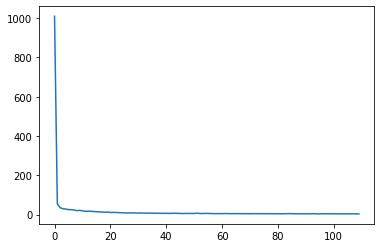

In [129]:
history = model.fit(X_train, train_y, epochs=1000, validation_data = (X_val, val_y), callbacks=[es])
model.save('./models/attempt9.h5')
plt.plot(history.history['loss'], label='train')

In [130]:
'''opt = Adam(learning_rate=0.1)
original_model = Sequential()
original_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),
                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))
original_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))
original_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),
                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))
original_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))
original_model.compile(loss='mse', optimizer=opt)
original_model.summary()'''

'opt = Adam(learning_rate=0.1)\noriginal_model = Sequential()\noriginal_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),\n                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))\noriginal_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))\noriginal_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),\n                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))\noriginal_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))\noriginal_model.compile(loss=\'mse\', optimizer=opt)\noriginal_model.summary()'

In [131]:
'''o_history = original_model.fit(X_train, train_y, epochs=1000)
original_model.save('./models/attempt2.h5')
plt.plot(o_history.history['loss'], label='train')'''

"o_history = original_model.fit(X_train, train_y, epochs=1000)\noriginal_model.save('./models/attempt2.h5')\nplt.plot(o_history.history['loss'], label='train')"

In [132]:
#plt.plot(o_history.history['loss'], label='train')

In [133]:
'''model.compile(optimizer = "adam", loss="mean_squared_error")
history = model.fit(X_train, train_y, epochs=5000)
model.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')'''

'model.compile(optimizer = "adam", loss="mean_squared_error")\nhistory = model.fit(X_train, train_y, epochs=5000)\nmodel.save(\'./models/attempt1.h5\')\nplt.plot(history.history[\'loss\'], label=\'train\')'

In [134]:
#nnmodel.test_model(x_test, test_y[1:])
pred_ret = model.predict(X_test)
#pred_ret = nnmodel.predict_ret(x_test, y=None)

In [135]:
'''pred = model.predict(X_train)
plt.plot(pred, color='r')
plt.plot(train_y, color='g')'''

"pred = model.predict(X_train)\nplt.plot(pred, color='r')\nplt.plot(train_y, color='g')"

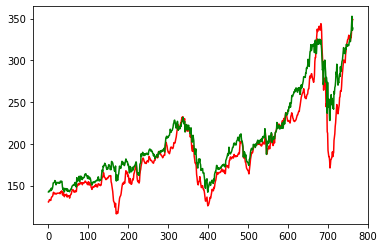

In [136]:
plt.plot(pred_ret, color='r')
plt.plot(np.array(test_y), color='g')
plt.show()

In [137]:
from sklearn.utils import check_array

In [138]:
pred_ret.shape

(763, 1)

171


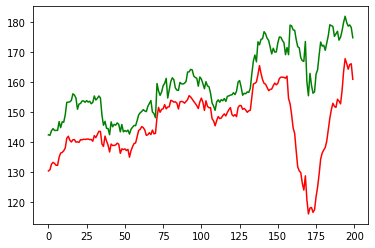

In [159]:
pred = np.array(pred_ret[:,0])
#np.argmin(pred - test_y)
#np.argmin(pred[:200] - test_y[:200])
plt.plot(pred[:200], color='r')
plt.plot(np.array(test_y[:200]), color='g')
print(np.argmin(pred[:200] - np.array(test_y[:200])))
plt.show()

In [139]:
'''def mean_absolute_percentage_error(y_true, y_pred): 
    print(y_pred.shape, y_true.shape)
    y_pred = np.array(y_pred)
    #y_true, y_pred = check_array(y_true, y_pred)
    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    diff = np.divide(np.abs(np.subtract(y_true, y_pred)), y_pred)
    print(diff)
    print(diff.shape)
    return np.mean(diff) * 100'''

'def mean_absolute_percentage_error(y_true, y_pred): \n    print(y_pred.shape, y_true.shape)\n    y_pred = np.array(y_pred)\n    #y_true, y_pred = check_array(y_true, y_pred)\n    ## Note: does not handle mix 1d representation\n    #if _is_1d(y_true): \n    #    y_true, y_pred = _check_1d_array(y_true, y_pred)\n    diff = np.divide(np.abs(np.subtract(y_true, y_pred)), y_pred)\n    print(diff)\n    print(diff.shape)\n    return np.mean(diff) * 100'

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [141]:
import math
mse = mean_squared_error(test_y, pred_ret)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y, pred_ret)
#mape = mean_absolute_percentage_error(np.array(test_y), pred_ret)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(347.5030423421303, 18.64143348410015, 13.785260339883424)


array([142.42  , 142.24  , 143.78  , 144.48  , 143.87  , 143.9   ,
       143.9   , 146.8   , 144.8   , 146.75  , 146.6   , 149.05  ,
       153.2   , 153.3   , 153.4   , 153.88  , 156.07  , 155.66  ,
       154.66  , 150.93  , 152.65  , 152.86  , 153.69  , 153.69  ,
       153.25  , 153.8   , 153.32  , 153.6   , 152.76  , 153.18  ,
       155.35  , 154.    , 154.54  , 155.35  , 154.7   , 148.96  ,
       145.6   , 146.9   , 144.6   , 144.49  , 142.45  , 146.71  ,
       145.09  , 145.9   , 145.64  , 146.38  , 145.88  , 143.4   ,
       145.85  , 143.39  , 143.85  , 143.51  , 144.    , 142.65  ,
       144.26  , 144.95  , 145.55  , 145.45  , 147.14  , 149.04  ,
       149.75  , 150.18  , 150.79  , 150.37  , 150.13  , 151.87  ,
       152.88  , 153.83  , 150.    , 149.48  , 148.11  , 159.5   ,
       157.04  , 155.56  , 156.65  , 158.75  , 159.54  , 161.2   ,
       154.65  , 157.42  , 160.14  , 161.4   , 160.78  , 158.02  ,
       157.3   , 157.2   , 159.86  , 159.41  , 159.32  , 159.6

In [213]:
pd.Series(np.array(test_y)) - pd.Series(np.array(pred_ret))

Exception: Data must be 1-dimensional